# Lab 14 - Hypothesis testing for proportions

This lab is an introduction to hypothesis testing for proportions (or probabilities or percentages), and follows the two scenarios presented in [11.1 Assessing Models](https://www.inferentialthinking.com/chapters/11/1/Assessing_Models.html) in the [Computational and Inferential Thinking](https://www.inferentialthinking.com/chapters/intro) textbook. 

Hypothesis testing is a method for estimating the probability of some data occuring according to a certain scenario (the *null hypothesis*).  The null hypothesis is rejected (or the *alternative hypothesis* is accepted) if this probability is small enough.

First, let's import all necessary libraries.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### U.S. Supreme Court, 1965: Swain vs. Alabama
See [https://www.inferentialthinking.com/chapters/11/1/Assessing_Models.html#us-supreme-court-1965-swain-vs-alabama] for a description of the case.

We want to simulate the probability that if 100 people are chosen at random from a population that is 26% Black, 8 or fewer of them are Black.

First we need to define the population (Black and Non-Black) and specify the probability for each group, as in Lab 12.  We can also call this population our *model*, because we are assuming it is an explanation for the data.

In [1]:
population = ["Black","Non-Black"]
pop_prob = [0.26,1-0.26]

<details> <summary>Answer:</summary>
    <code>population = ["Black","Non-Black"]
pop_prob = [0.26,1-0.26]</code>
</details>

Next, simulate just one sample of 100 people randomly chosen from the population, and count the number of Black people in the sample.

The steps are:
- take a sample size 100 from the population
- convert the sample into a Pandas series and compute the value counts
- from the value counts, find the number of Black people in the sample

In [4]:
sample = np.random.choice(population, p= pop_prob, size = 100)
sample_counts = pd.Series(sample).value_counts()
sample_counts["Black"]

27

<details> <summary>Answer:</summary>
    <code>sample = np.random.choice(population, p= pop_prob, size = 100)
sample_counts = pd.Series(sample).value_counts()
sample_counts["Black"]</code>
</details>

Now we want to repeat this 10,000 times to take 10,000 different samples and save the number of Black people in each sample in a list.  Can you set up the loop to do this?  

Hint:  Use a smaller number than 10,000 while you are testing your loop.  Once it's working, change it back to 10,000.

In [6]:
counts = []
for i in range(10000):
    sample = np.random.choice(population, p= pop_prob, size = 100)
    sample_counts = pd.Series(sample).value_counts()
    counts.append(sample_counts["Black"])

<details> <summary>Answer:</summary>
    <code>counts = []
for i in range(10000):
    sample = np.random.choice(population, p= pop_prob, size = 100)
    sample_counts = pd.Series(sample).value_counts()
    counts.append(sample_counts["Black"])</code>
</details>

Finally, let's plot a histogram of the counts of Black people in the 10,000 samples.  Remember you will have to convert your list into a Pandas Series first.

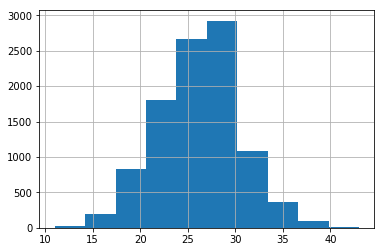

In [7]:
pd.Series(counts).hist()

In [9]:
sample_counts

Non-Black    67
Black        33
dtype: int64

<details> <summary>Answer:</summary>
    <code>pd.Series(counts).hist()</code>
</details>

This histogram gives us a good estimate of the distribution of the number of Black men on a jury panel that has been randomly selected from the population.  What's the probability that there are 8 or fewer Black men on the jury panel?  We can't figure out the probabilty as an exact number, but is it big? Small?  Very small?

The probabily that only 8 Black men would be selected for the jury panel if it was chosen completely at random is very, very small.  It could have happened, but if there is another explanation (ex. jury panel was manipulated due to racism) with a higher probability then that explanation is more likely.  

### Mendel’s Pea Flowers

Gregor Mendel is the father of modern genetics and conducted many breeding experiments on pea plants (he grew 28,000 pea plants over his lifetime!).  The textbook explanation is [here](https://www.inferentialthinking.com/chapters/11/1/Assessing_Models.html#mendels-pea-flowers), but there is a more detailed explanation [here](https://www.khanacademy.org/science/high-school-biology/hs-classical-genetics/hs-introduction-to-heredity/a/mendel-and-his-peas).

Mendel's model is that pea plants will have purple flowers 75% of the time and white flowers 25% of the time.  In one test, he grew 929 pea plants and 705 had purple flowers.  Let's conduct a simulation to test if this data has a high probability of occuring under this model.  That is, let's test that the *data is consistent with the model*.

First set up the population/model:

Next, simulate one sample from the population and count the number of purple flowers.

Then repeat your simulation 10,000 times.

Finally, plot a histogram of the counts of purple flowers in the simulations.

What's the probabilty (high, low, etc.) that 705 flowers were purple?  Do you think Mendel's data is consistent with his model?